In [3]:
! python -m pip install numpy matplotlib pandas scipy seaborn scikit-learn tensorflow keras_tuner

  Using cached numpy-2.4.1-cp313-cp313-win_amd64.whl.metadata (6.6 kB)
  Using cached matplotlib-3.10.8-cp313-cp313-win_amd64.whl.metadata (52 kB)
  Using cached pandas-3.0.0-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached scipy-1.17.0-cp313-cp313-win_amd64.whl.metadata (60 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached scikit_learn-1.8.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached tensorflow-2.20.0-cp313-cp313-win_amd64.whl.metadata (4.6 kB)
  Using cached keras_tuner-1.4.8-py3-none-any.whl.metadata (5.6 kB)
  Using cached contourpy-1.3.3-cp313-cp313-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp313-cp313-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp313-cp313-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp313-cp313-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
! python -m pip install streamlit

  Using cached streamlit-1.53.1-py3-none-any.whl.metadata (10 kB)
  Using cached altair-6.0.0-py3-none-any.whl.metadata (11 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached cachetools-6.2.6-py3-none-any.whl.metadata (5.6 kB)
  Using cached click-8.3.1-py3-none-any.whl.metadata (2.6 kB)
  Using cached pandas-2.3.3-cp313-cp313-win_amd64.whl.metadata (19 kB)
  Using cached pyarrow-23.0.0-cp313-cp313-win_amd64.whl.metadata (3.1 kB)
  Using cached tenacity-9.1.2-py3-none-any.whl.metadata (1.2 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl.metadata (7.1 kB)
  Using cached watchdog-6.0.0-py3-none-win_amd64.whl.metadata (44 kB)
  Using cached gitpython-3.1.46-py3-none-any.whl.metadata (13 kB)
  Using cached pydeck-0.9.1-py2.py3-none-any.whl.metadata (4.1 kB)
  Using cached narwhals-2.15.0-py3-none-any.whl.metadata (13 kB)
  Using cached gitdb-4.0.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using


[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib.pyplot as mpl

from tensorflow import keras 
from keras.layers import Dense, Flatten, Input
from keras.models import Sequential
from keras.optimizers import Adam
from keras_tuner import RandomSearch

10. I denna uppgift ska vi använda MNIST-datan som vi arbetat med tidigare. Detta för att ha ett bekant dataset att arbeta med och experimentera med ANN-modeller. 

Hämtar MNIST-datan och delar upp det i tränings och testdata.

In [6]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

a) Träna en ANN-modell på MNIST-datan. Vad får du för resultat? 

Normaliserar pixlarna genom att divivdera x_train och x_test med 255.

In [7]:
X_train = x_train / 255.0
X_test = x_test / 255.0

Printar ut formen på all data.

In [8]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (60000, 28, 28)
x_test:  (10000, 28, 28)
y_train:  (60000,)
y_test:  (10000,)


En visualisering på en siffra på MNIST.

Label: 5


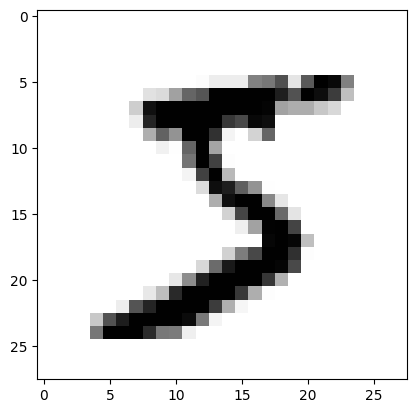

In [9]:
plt.imshow(x_train[0], cmap=mpl.cm.binary)
print("Label:", y_train[0])

Bygger ett neuralt nätverk som plattar ut 28×28-bilder, har två dolda lager och klassficerar dem i 10 klasser. De dolda lagren använder relu som aktiveringsfunktion.

In [10]:
model1 = Sequential()
model1.add(Input(shape=(28, 28)))
model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dense(64, activation='relu'))
model1.add(Dense(10, activation='softmax'))

Kompilerar modellen så att den är redo att tränas.

In [11]:
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

Tränar modellen i tio epoker med en validation-split på 0.2.

In [12]:
history = model1.fit(X_train, y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9219 - loss: 0.2681 - val_accuracy: 0.9624 - val_loss: 0.1344
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9670 - loss: 0.1087 - val_accuracy: 0.9690 - val_loss: 0.1063
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9770 - loss: 0.0744 - val_accuracy: 0.9694 - val_loss: 0.1009
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9825 - loss: 0.0569 - val_accuracy: 0.9744 - val_loss: 0.0949
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9860 - loss: 0.0437 - val_accuracy: 0.9755 - val_loss: 0.0887
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9882 - loss: 0.0356 - val_accuracy: 0.9736 - val_loss: 0.0993
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9893 - loss: 0.0307 - val_accuracy: 0.9727 - val_loss: 0.1066
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9923 - loss: 0.0238 - 

Ett diagram som visar hur accuracy och loss förändras efter varje epoch för både tränings och valideringsdata. Resultat är bra eftersom accuracy är hög och loss ligger lågt.

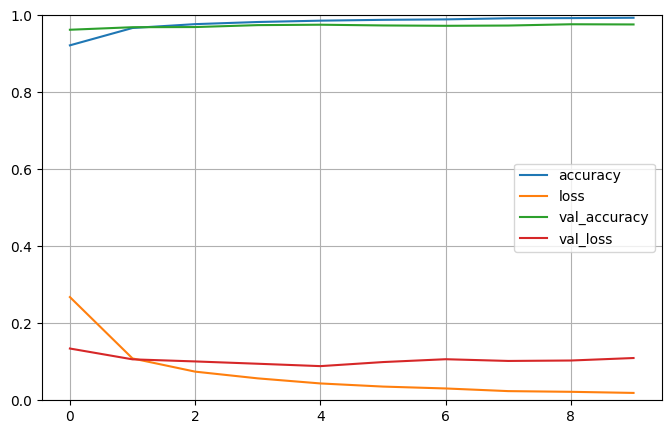

In [13]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Evaluerar modellen - ett högt accuracy och en låg loss tyder på att modellen presterar bra.

In [14]:
model1.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9752 - loss: 0.1142


[0.11415595561265945, 0.9751999974250793]

Enligt evalueringen presterar modellen mycket bra, vilket innebär att den har lärt sig mönstren väl och kommer att göra få misstag. Tränings och valideringsdatan har liknande resultat vilket innebär att modellen inte är överanpassad.

b) Prova justera hyperparametrarna med *KerasTuner*. Notera, du har som vanligt dokumentationen till din hjälp. Får du bättre resultat? 

En keras modell byggs med samma grundstruktur som tidigare, men med justerbart antal neuroner och learning rate.

In [15]:
def build_model(hp):
    model2 = Sequential()

    model2.add(Input(shape=(28,28)))
    model2.add(Flatten())

    model2.add(Dense(
        units=hp.Int('units_1',min_value=64, max_value=256, step=64), activation='relu'
    ))
    
    model2.add(Dense(
        units=hp.Int('units_2', min_value=32, max_value=128, step=32), activation='relu'
    ))
    model2.add(Dense(10, activation='softmax'))

    model2.compile(optimizer=Adam(
        hp.Choice('learning_rate',  [1e-2, 1e-3, 1e-4])
    ),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
    )
    
    return model2

En tuner som söker efter de bästa hyperparametrarna för modellen med Random Search.

In [16]:
tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=10,
    executions_per_trial=1,
    directory=r"C:\mnist_tuner",
    project_name="mnist_randomsearch",
)

Tunern tränar modellen i 5 epoker och har en validation-split på 0.1.

In [17]:
tuner.search(
    X_train,
    y_train,
    epochs = 5,
    validation_split=0.1
)

Trial 10 Complete [00h 00m 23s]
val_accuracy: 0.9661666750907898

Best val_accuracy So Far: 0.9783333539962769
Total elapsed time: 00h 04m 47s


Hämtar den bästa modellen.

In [18]:
best_model = tuner.get_best_models(num_models=1)[0]

c:\Users\genc-\Downloads\Desktop\Skola\11-ai-teori-och-tillämpning-del-2\kunskapskontroll_del1\.venv\Lib\site-packages\keras\src\saving\saving_lib.py:797: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


Tränar modellen med de bästa hyperparametrarna.

In [19]:
history = best_model.fit(X_train, y_train, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9885 - loss: 0.0342 - val_accuracy: 0.9810 - val_loss: 0.0706
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9928 - loss: 0.0237 - val_accuracy: 0.9836 - val_loss: 0.0634
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9934 - loss: 0.0197 - val_accuracy: 0.9838 - val_loss: 0.0655
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9943 - loss: 0.0172 - val_accuracy: 0.9778 - val_loss: 0.0843
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9948 - loss: 0.0158 - val_accuracy: 0.9831 - val_loss: 0.0717
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9949 - loss: 0.0160 - val_accuracy: 0.9816 - val_loss: 0.0757
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9963 - loss: 0.0110 - val_accuracy: 0.9789 - val_loss: 0.1026
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9951 - loss: 0.0137 - 

Utvärderar tuner-modellen på testdata.

In [20]:
test_loss, test_acc = best_model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9777 - loss: 0.1128


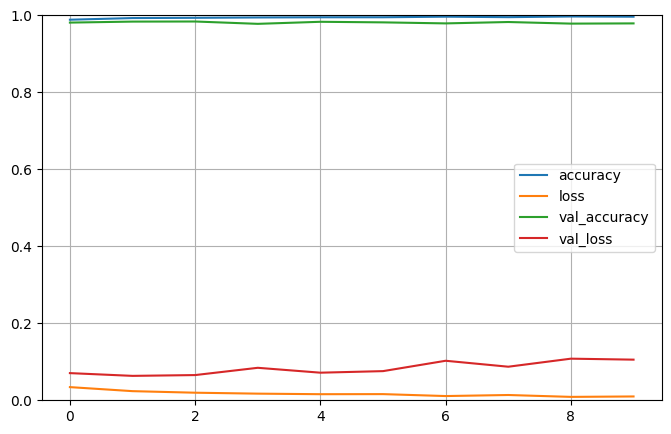

In [21]:
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Med KerasTuner ändras inte resultatet så mycket. När modellen tränas utan tuning får den redan ett bra utvärderingsresultat, därför blir skillnaden liten med eller utan kerastuner.